<a href="https://colab.research.google.com/github/fajarpw/PCVK_Genap_2021/blob/main/WEEK12ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Akses Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Import Library
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

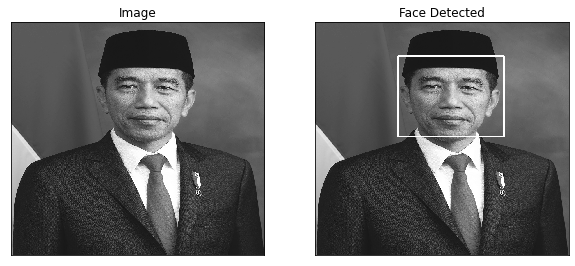

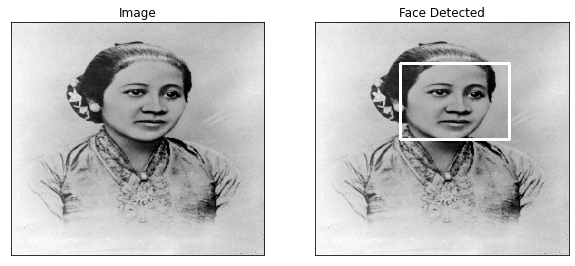

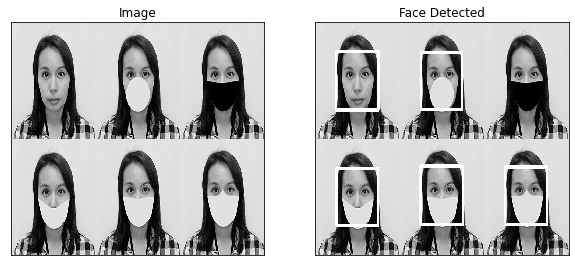

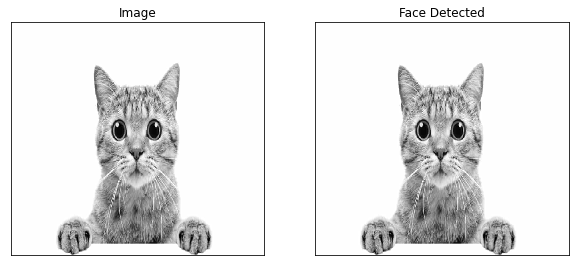

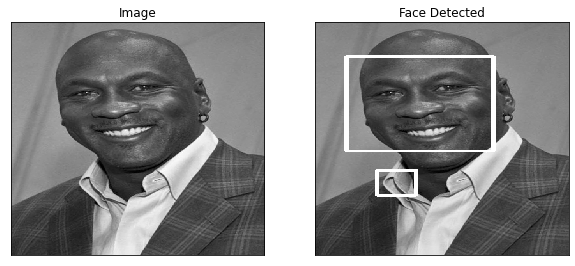

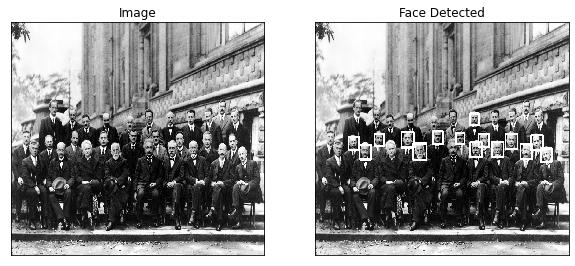

In [7]:
# Face Detection
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_frontalface_default.xml')

jokowi  = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/jokowi.jpg',0)
kartini = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/kartini.jpg',0)
cat = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/kucing.jpg',0)
mask = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/mask.png',0)
mjordan = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/mjordan.jpg',0)
solvayconf = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/solvayconf.jpg',0)

def bgr_to_rgb(img):
  img_copy = img.copy()
  rgb = cv.cvtColor(img_copy, cv.COLOR_RGB2RGBA)
  return rgb

def bgr_to_gray(img):
  img_copy = img.copy()
  gray = cv.cvtColor(img_copy, cv.COLOR_BGR2GRAY)
  return gray

def detect_face(img):
  img_copy = img.copy()

  faces = face_cascade.detectMultiScale(img_copy, 1.3, 5)
  for (x,y,w,h) in faces:
      img_copy = cv.rectangle(img_copy,(x,y),(x+w,y+h),(255,0,0),5)
  return img_copy

img_list = [jokowi, kartini, mask, cat, mjordan, solvayconf]
face_detected = []

for i in range (len(img_list)):
  face_detected.append(detect_face(img_list[i]))

  plt.figure(figsize = (10,30))

  plt.subplot(len(img_list),2,(i*2)+1)
  plt.imshow(img_list[i], cmap='gray', interpolation='nearest', aspect='auto')
  plt.title('Image'), plt.xticks([]), plt.yticks([])
  
  plt.subplot(len(img_list),2,(i*2)+2)
  plt.imshow(face_detected[i], cmap='gray', interpolation='nearest', aspect='auto')
  plt.title('Face Detected'), plt.xticks([]), plt.yticks([])

  plt.show()

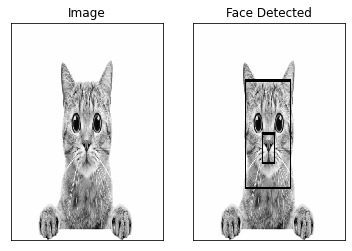

In [ ]:
cat = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/kucing.jpg',0)

cat_cascade = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_frontalcatface_extended.xml')
cat_copy = cat.copy()

cat_faces = cat_cascade.detectMultiScale(cat_copy, 1.1, 5)
for (x,y,w,h) in cat_faces:
    cat_copy = cv.rectangle(cat_copy,(x,y),(x+w,y+h),(0,255,0),5)

plt.subplot(1,2,1)
plt.imshow(cat, cmap='gray', interpolation='nearest', aspect='auto')
plt.title('Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(cat_copy, cmap='gray', interpolation='nearest', aspect='auto')
plt.title('Face Detected'), plt.xticks([]), plt.yticks([])

plt.show()

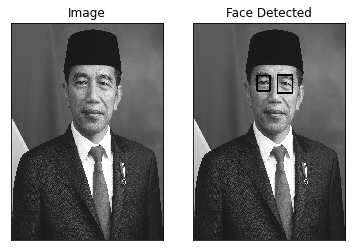

In [ ]:
eye_cascade = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_eye.xml')
jokowi_copy = jokowi.copy()

eye_cascade = eye_cascade.detectMultiScale(jokowi_copy, 1.1, 5)
for (x,y,w,h) in eye_cascade:
    jokowi_copy = cv.rectangle(jokowi_copy,(x,y),(x+w,y+h),(0,255,0),5)

plt.subplot(1,2,1)
plt.imshow(jokowi, cmap='gray', interpolation='nearest', aspect='auto')
plt.title('Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(jokowi_copy, cmap='gray', interpolation='nearest', aspect='auto')
plt.title('Face Detected'), plt.xticks([]), plt.yticks([])

plt.show()

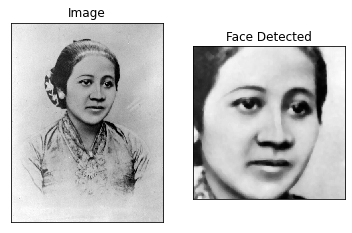

In [10]:
kartini_blur1 = kartini.copy()

faces = face_cascade.detectMultiScale(kartini_blur1, 1.3, 5)
for (x,y,w,h) in faces:
    # kartini_blur = cv.rectangle(mjordan_blur,(x,y),(x+w,y+h),(255,0,0),5)
    roi = kartini_blur1[y:y+h, x:x+w]
    blur = cv.medianBlur(roi,5)
    kartini_blur1[y:y+h, x:x+w] = blur

plt.subplot(1,2,1)
plt.imshow(kartini, cmap='gray', interpolation='nearest')
plt.title('Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(blur, cmap='gray', interpolation='nearest')
plt.title('Face Detected'), plt.xticks([]), plt.yticks([])

plt.show()

In [11]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [12]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [13]:
# initialize the Haar Cascade face detection model
# face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_frontalface_default.xml')

In [14]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


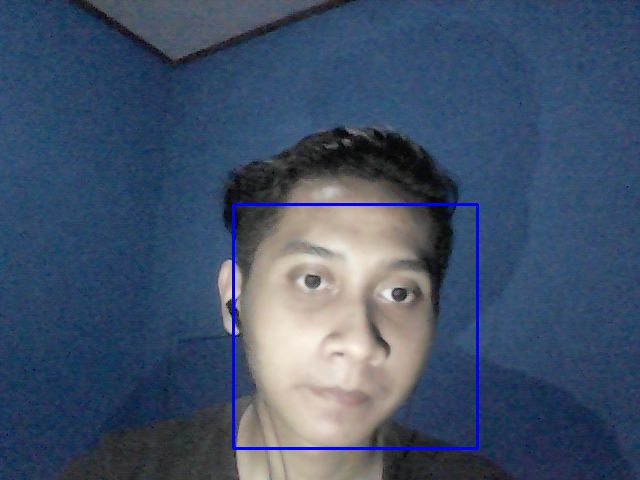

In [18]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [19]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [20]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>